In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X.shape

(442, 10)

In [4]:
y.shape

(442,)

In [5]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
lr.score(X_train,y_train)

0.5323672232993288

In [9]:
lr.score(X_test,y_test)

0.4399338661568968

In [10]:
lr.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 10,
 'coef_': array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 'rank_': 10,
 'singular_': array([1.78538639, 1.09746576, 0.98094591, 0.85994568, 0.72757365,
        0.68118726, 0.65211038, 0.57737425, 0.23654159, 0.08442943]),
 'intercept_': 151.88331005254167}

# Own Class

In [11]:
class MiniBatchGD:

    def __init__(self,*,learning_rate,epochs,batch_size):
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X,y):

        self.intercept = 0
        self.coef = np.ones(shape=(X.shape[1],))
        
        for _ in range(self.epochs):
            for _ in range(X.shape[0]//self.batch_size):
                
                indx = np.random.randint(X.shape[0],size=self.batch_size)
                
                y_pred = np.dot(X[indx],self.coef) + self.intercept
                
                bias_slope = np.sum(y[indx]-y_pred)*(-2/self.batch_size)
                self.intercept = self.intercept - (self.lr*bias_slope)
                
                coef_slope = np.dot(X[indx].T,y[indx]-y_pred)*(-2/self.batch_size)
                self.coef = self.coef - (self.lr*coef_slope)


    def predict(self,X):
        return np.dot(X,self.coef)+self.intercept

In [12]:
mbgd = MiniBatchGD(learning_rate=0.1,epochs=100,batch_size=100)

In [13]:
mbgd.fit(X_train,y_train)

In [14]:
mbgd.coef

array([ 35.93111395,   5.35088037, 108.52696781,  84.83355238,
        32.25247595,  23.71675497, -67.19887904,  68.96968007,
       106.05341086,  62.52018157])

In [15]:
mbgd.intercept

153.47592438526797

# 3 variants of Gradient Descent

In [16]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [17]:
X,y = make_regression(n_samples=300,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=42)

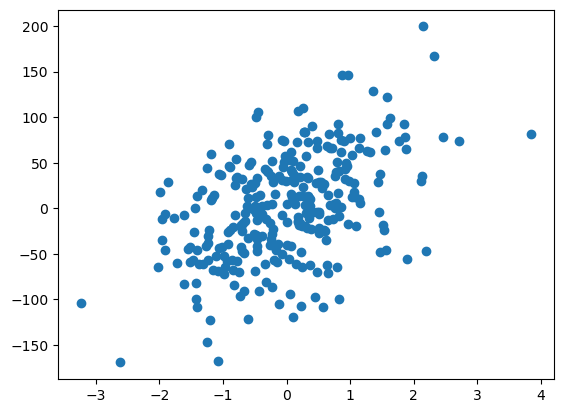

In [18]:
plt.scatter(X,y)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X,y)

LinearRegression()

In [21]:
lr.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([27.6654697]),
 'rank_': 1,
 'singular_': array([17.0182998]),
 'intercept_': 1.869455230361416}

In [22]:
class GradientDescent:

    def __init__(self,learning_rate,epochs):
        self.slope = -200
        self.bias = 200
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):

        m = [self.slope]
        b = [self.bias]
        
        for _ in range(self.epochs):
            b_slope = -2 * np.sum(y-self.slope*X.ravel()-self.bias)
            m_slope = -2*np.sum(X.ravel()*(y-self.slope*X.ravel()-self.bias))
            self.bias = self.bias - (self.lr*b_slope)
            self.slope = self.slope - (self.lr*m_slope)
            b.append(self.bias)
            m.append(self.slope)
            
        print(self.slope)
        print(self.bias)

        return m,b

    def predict(self,X):
        return self.slope*X.ravel()+self.bias

In [23]:
gd = GradientDescent(0.001,100)

In [24]:
gd_m,gd_b = gd.fit(X,y)

27.665469702179355
1.8694552303614171


In [25]:
class SGDescent:

    def __init__(self,learning_rate,epochs):
        self.slope = -200
        self.bias = 200
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):

        m = [self.slope]
        b = [self.bias]
        
        for _ in range(self.epochs):
            for _ in range(X.shape[0]):
                indx = np.random.randint(X.shape[0])
                
                b_slope = -2 * np.sum(y[indx]-self.slope*X[indx].ravel()-self.bias)
                m_slope = -2*np.sum(X[indx].ravel()*(y[indx]-self.slope*X[indx].ravel()-self.bias))
                self.bias = self.bias - (self.lr*b_slope)
                self.slope = self.slope - (self.lr*m_slope)
                b.append(self.bias)
                m.append(self.slope)
           
        print(self.slope)
        print(self.bias)

        return m,b

    def predict(self,X):
        return self.slope*X.ravel()+self.bias

In [26]:
sgd = SGDescent(0.01,300)

In [27]:
sgd_m,sgd_b = sgd.fit(X,y)

24.068885278735603
-3.168974181698988


In [28]:
class MiniBatchGD:

    def __init__(self,*,learning_rate,epochs,batch_size):
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.slope = -200
        self.bias = 200

    def fit(self,X,y):

        m = [self.slope]
        b = [self.bias]
        
        for _ in range(self.epochs):
            for _ in range(X.shape[0]//self.batch_size):
                
                indx = np.random.randint(X.shape[0],size=self.batch_size)
                
                y_pred = np.dot(X[indx].ravel(),self.slope) + self.bias
                
                bias_slope = np.sum(y[indx]-y_pred)*(-2/self.batch_size)
                self.bias = self.bias - (self.lr*bias_slope)
                
                coef_slope = np.dot(X[indx].T.ravel(),y[indx]-y_pred)*(-2/self.batch_size)
                self.slope = self.slope - (self.lr*coef_slope)

                b.append(self.bias)
                m.append(self.slope)
                
        print(self.slope)
        print(self.bias)

        return m,b

    def predict(self,X):
        return np.dot(X,self.coef)+self.intercept

In [29]:
mbgd = MiniBatchGD(learning_rate = 0.01, epochs = 300, batch_size = 30)

In [30]:
mbgd_m,mbgd_b = mbgd.fit(X,y)

27.819092727246442
1.9378442089247767


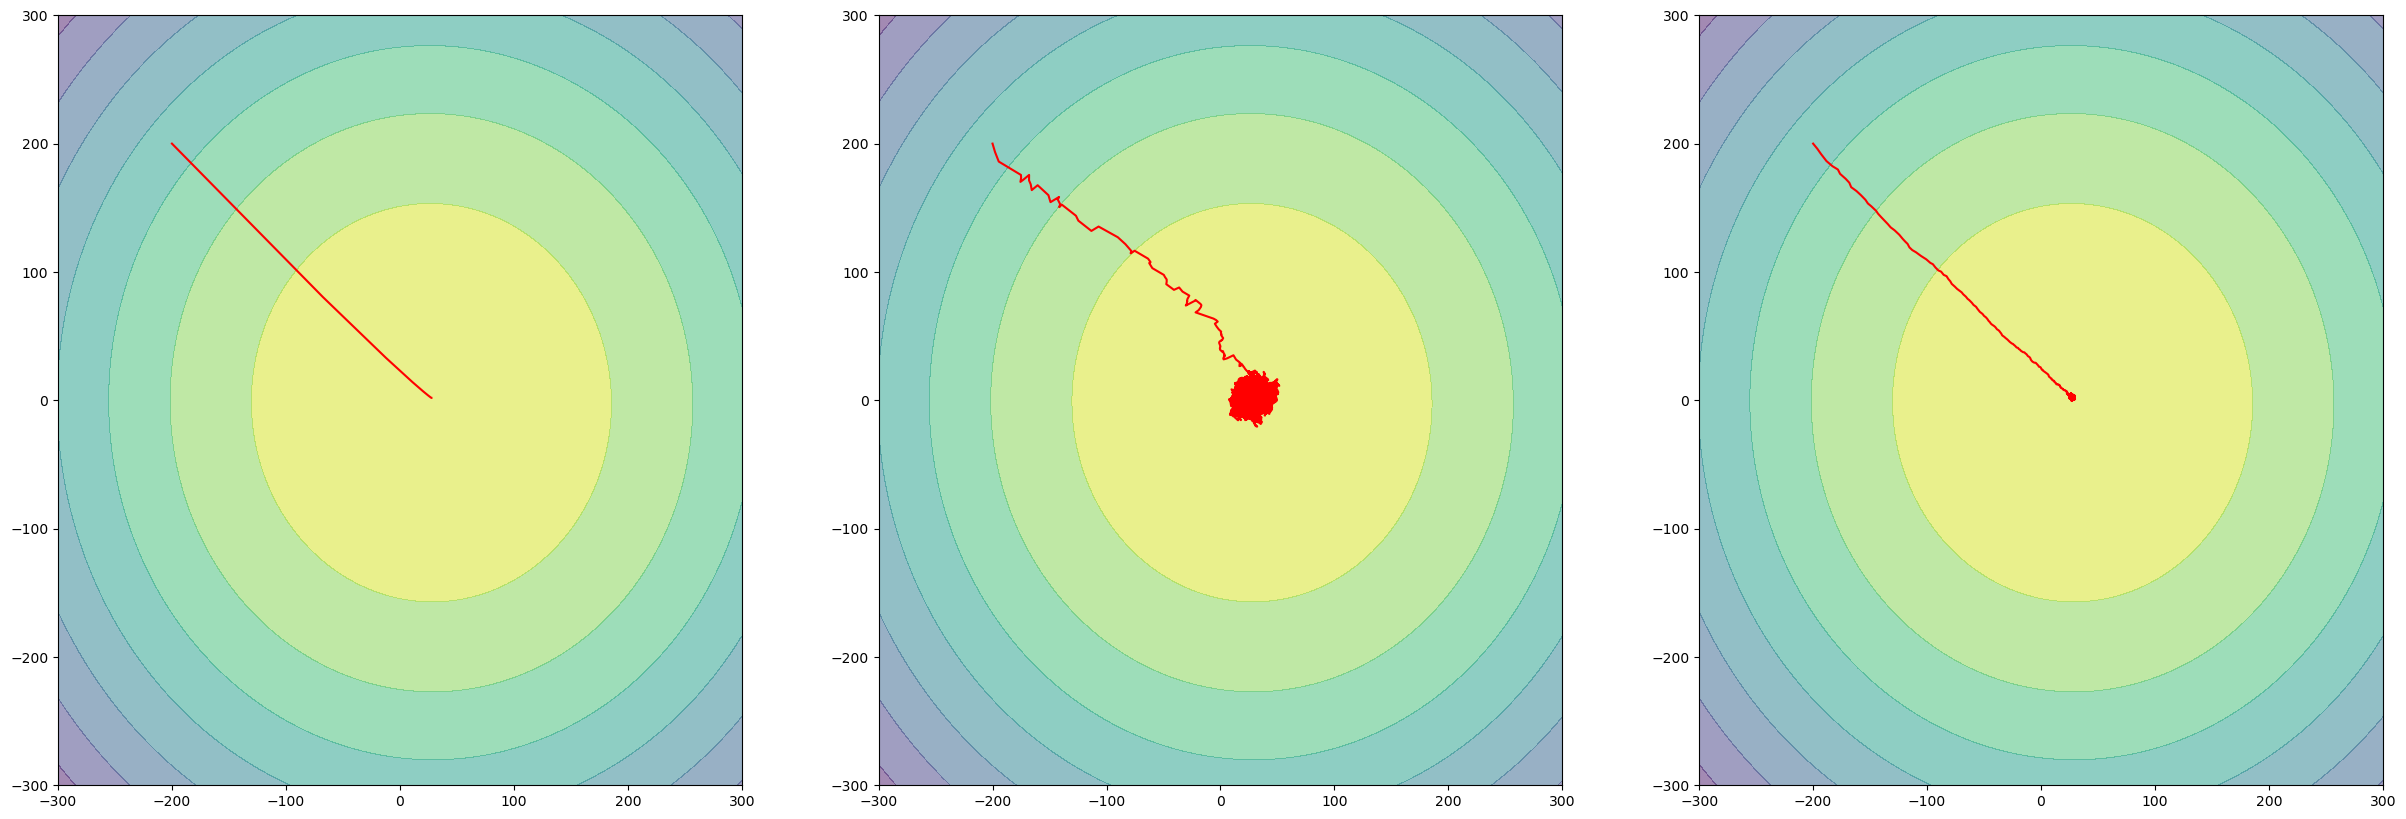

In [31]:
slope = np.linspace(-300,300,100)
bias = np.linspace(-300,300,100)

w1, w0 = np.meshgrid(slope,bias)

loss = []

for j,k in zip(w1.ravel(),w0.ravel()):
    loss.append(np.sum(np.power(y - (j*X.ravel()-k), 2)))


loss = np.array(loss).reshape(100,100)

fig = plt.figure(figsize=(30,10))


ax = plt.subplot(1,3,1)
f = ax.contourf(w1,w0,loss,zorder=1,cmap='viridis_r',alpha=0.5)
#ax.set_xlim(-200,100)
#ax.set_ylim(-20,250)
#ax.scatter(gd_m,gd_b,c='black',marker='x',zorder=40,alpha=1)
ax.plot(gd_m,gd_b,color='red',zorder=40,alpha=1)


ax1 = plt.subplot(1,3,2)
g = ax1.contourf(w1,w0,loss,zorder=1,cmap='viridis_r',alpha=0.5)
#ax1.set_xlim(-200,100)
#ax1.set_ylim(-20,250)
#ax1.scatter(sgd_m,sgd_b,color='black',marker='x',zorder=40,alpha=1)
ax1.plot(sgd_m,sgd_b,color='red',zorder=40,alpha=1)

ax2 = plt.subplot(1,3,3)
h = ax2.contourf(w1,w0,loss,zorder=1,cmap='viridis_r',alpha=0.5)
#ax2.set_xlim(-200,100)
#ax2.set_ylim(-20,250)
#ax2.scatter(sgd_m,sgd_b,color='black',marker='x',zorder=40,alpha=1)
ax2.plot(mbgd_m,mbgd_b,color='red',zorder=40,alpha=1)


plt.show()